In [122]:
import warnings
warnings.filterwarnings(action="ignore",category=FutureWarning)

In [175]:
#Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [124]:
pd.options.display.float_format="{:,.2f}".format

In [176]:
#Loading the datasets
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [177]:
#Joining the datasets
df=pd.concat([train,test],axis=0)
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.00,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.00,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.00,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.00,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.00,satisfied


In [127]:
df.shape

(129880, 25)

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129880 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   id                                 129880 non-null  int64  
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Inflight wifi service              129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Ease of Online booking             129880 non-null  int64  
 11  Gate location                      12988

In [178]:
#Checking for null values
100*(df.isnull().sum()/len(df))

Unnamed: 0                          0.00
id                                  0.00
Gender                              0.00
Customer Type                       0.00
Age                                 0.00
Type of Travel                      0.00
Class                               0.00
Flight Distance                     0.00
Inflight wifi service               0.00
Departure/Arrival time convenient   0.00
Ease of Online booking              0.00
Gate location                       0.00
Food and drink                      0.00
Online boarding                     0.00
Seat comfort                        0.00
Inflight entertainment              0.00
On-board service                    0.00
Leg room service                    0.00
Baggage handling                    0.00
Checkin service                     0.00
Inflight service                    0.00
Cleanliness                         0.00
Departure Delay in Minutes          0.00
Arrival Delay in Minutes            0.30
satisfaction    

In [179]:
#Dropping the null values of the feature Arrival Delay in Minutes since it only represents 0.3% of the total values
df=df.dropna()

In [180]:
#Dropping the columns Unnamed:0 and id because the don´t add value to the dataset
df=df.drop(columns=["Unnamed: 0","id"])
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.00,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.00,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.00,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.00,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.00,satisfied


In [181]:
#Analyzing how balanced is the label

df["satisfaction"].value_counts(normalize=True)*100

neutral or dissatisfied   56.55
satisfied                 43.45
Name: satisfaction, dtype: float64

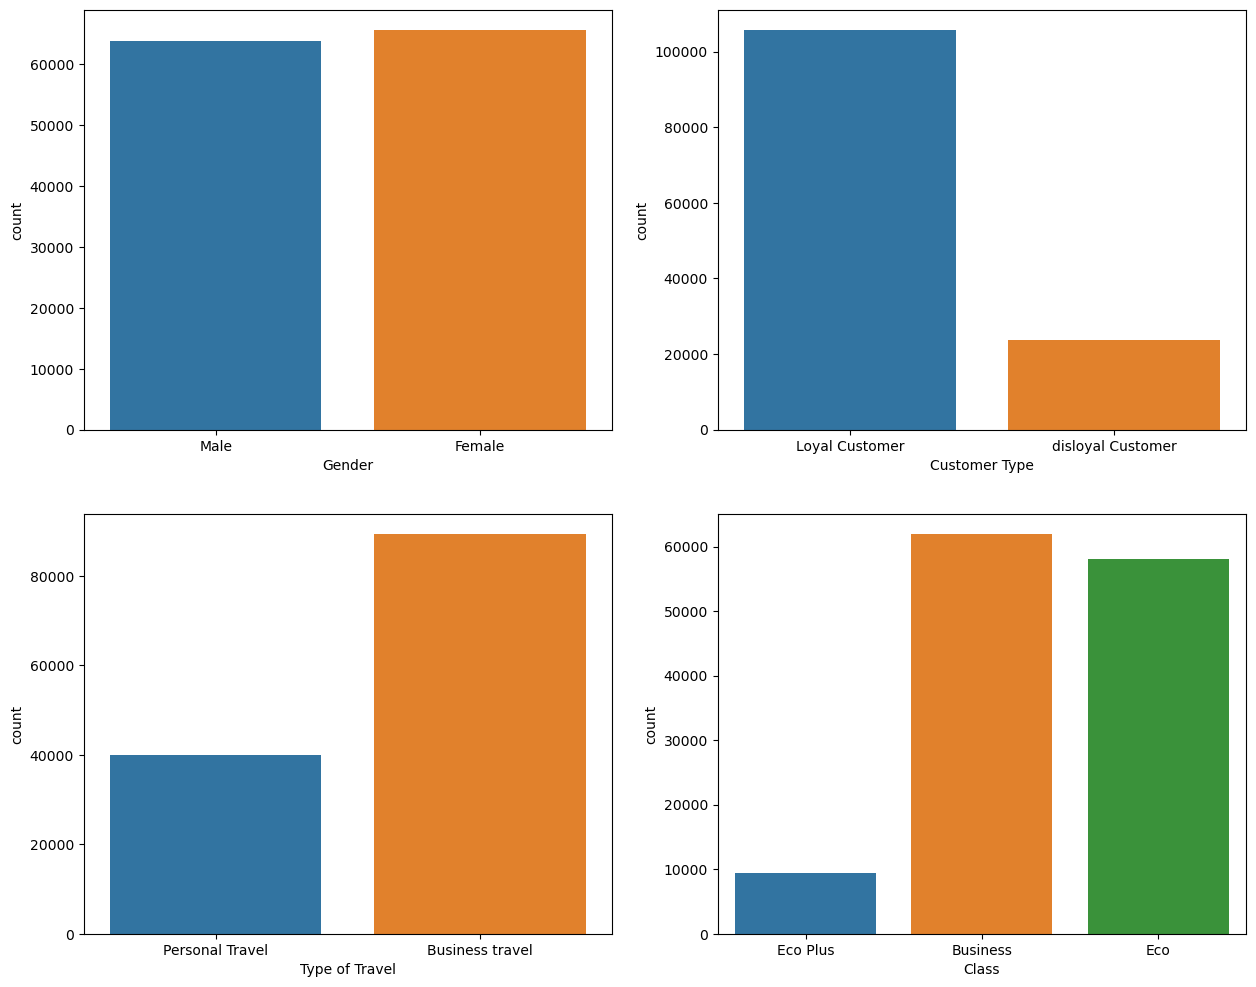

In [182]:
#Analyzing the distributions of the categorical features

f,axes=plt.subplots(2,2,figsize=(15,12))

sns.countplot(df["Gender"],ax=axes[0,0]);
sns.countplot(df['Customer Type'],ax=axes[0,1]);
sns.countplot(df['Type of Travel'],ax=axes[1,0]);
sns.countplot(df['Class'],ax=axes[1,1]);

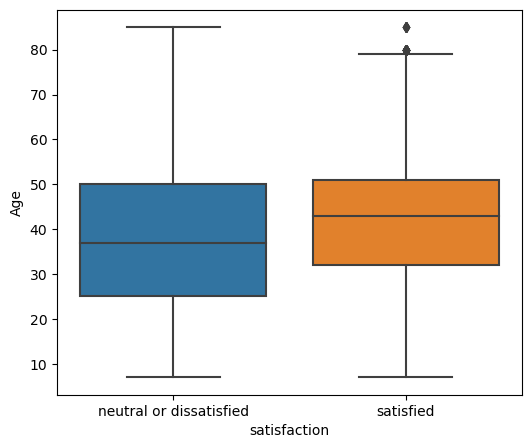

In [185]:
#Analyzing the distribution of Age depending on the level of satisfaction
plt.figure(figsize=(6,5));
sns.boxplot(data=df,y="Age",x="satisfaction");

In [186]:
#Transforming the categorical values of the label in numerical values in order to train the Machine learning model

df["satisfaction"]=df["satisfaction"].apply(lambda x: 1 if x=="satisfied" else 0)

In [187]:
#Finding the categorical features and the amount of different values the have

categorical=df.select_dtypes(include="object").columns

for line in categorical:
    print("The feature " + line + " contains" ,  str(len(df[line].unique())) ," distinct values ")

The feature Gender contains 2  distinct values 
The feature Customer Type contains 2  distinct values 
The feature Type of Travel contains 2  distinct values 
The feature Class contains 3  distinct values 


In [188]:
#Converting the categorical features into dummies variables

df=pd.get_dummies(df)

In [189]:
#Defining X and y
X=df.drop(columns=["satisfaction"])
y=df[["satisfaction"]]

In [190]:
#Splitting the data in train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=42)

In [191]:
#Standardization the data

from sklearn.preprocessing import StandardScaler

scaler_x=StandardScaler()

scaler_x.fit(X_train)

X_train=pd.DataFrame(scaler_x.transform(X_train),columns=X_train.columns)

X_test=pd.DataFrame(scaler_x.transform(X_test),columns=X_test.columns)

In [192]:
#EVALUATING DIFFERENT MACHINE LEARNING MODELS

In [147]:
#Importing the libraries
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,ExtraTreesClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.model_selection import KFold,cross_val_score
from sklearn.preprocessing import StandardScaler

In [148]:
#Preparing the models
models=[]
models.append(("LDA",LinearDiscriminantAnalysis()))
models.append(("Naive Bayes",GaussianNB()))
models.append(("KNN",KNeighborsClassifier()))
models.append(("Decision Tree",DecisionTreeClassifier()))
models.append(("Random Forest",RandomForestClassifier()))
models.append(("Bagging Class",BaggingClassifier()))
models.append(("Extra trees",ExtraTreesClassifier()))
models.append(("Ada Boost",AdaBoostClassifier()))
models.append(("Gradient Boosting",GradientBoostingClassifier()))

#Evaluate each model in turn
results=[]
names=[]
scoring="accuracy"

for name, model in models:
  kfold=KFold(n_splits=10,shuffle=True)
  cv_results=cross_val_score(model,X_train,y_train.values.reshape(-1,1).ravel(),cv=kfold,scoring=scoring)
  results.append(cv_results)
  names.append(name)
  print(f"{name} :{cv_results.mean()*100:,.2f}% ({cv_results.std()*100:.2f}%)")

LDA :87.16% (0.46%)
Naive Bayes :84.81% (0.43%)
KNN :92.75% (0.26%)
Decision Tree :94.62% (0.32%)
Random Forest :96.28% (0.21%)
Bagging Class :95.82% (0.18%)
Extra trees :96.09% (0.11%)
Ada Boost :92.75% (0.23%)
Gradient Boosting :94.30% (0.13%)


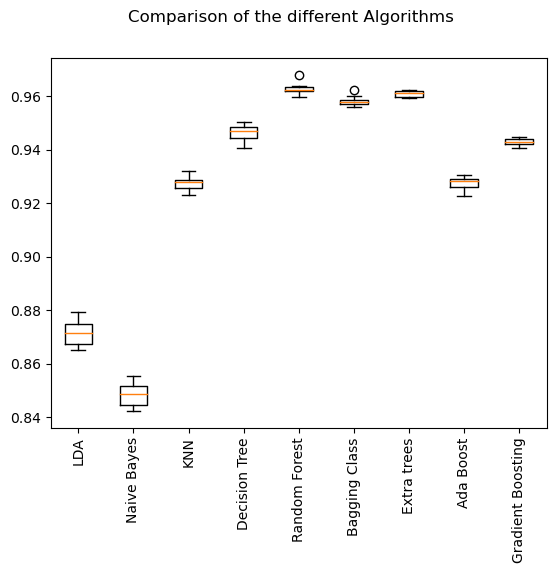

In [149]:
import matplotlib.pyplot as plt
fig=plt.figure()
fig.suptitle("Comparison of the different Algorithms")
ax=fig.add_subplot(111)
plt.rcParams["figure.figsize"]=[4,6]
plt.boxplot(results)
ax.set_xticklabels(names,rotation="vertical")
plt.show()

In [154]:
#Fine Tuning the best model

from sklearn.model_selection import GridSearchCV

import numpy as np

max_depth=np.arange(15,20)

parametros=dict(max_depth=max_depth)

model=RandomForestClassifier()

kfold=KFold(n_splits=5,shuffle=True)

grid_result=GridSearchCV(estimator=model,param_grid=parametros,cv=kfold)

grid_result.fit(X_train,y_train.values.reshape(-1,1).ravel())

#Summarize_results

print("Best : %f using the params %s" % (grid_result.best_score_ , grid_result.best_params_))

means=grid_result.cv_results_["mean_test_score"]
stds=grid_result.cv_results_["std_test_score"]
params=grid_result.cv_results_["params"]


for mean,stdev,param in zip(means,stds,params):
    
  print("%f (%f) with %r" % (mean,stdev,param))

Best : 0.961717 using the params {'max_depth': 19}
0.959775 (0.001216) with {'max_depth': 15}
0.960371 (0.001355) with {'max_depth': 16}
0.961088 (0.000818) with {'max_depth': 17}
0.961606 (0.001280) with {'max_depth': 18}
0.961717 (0.001239) with {'max_depth': 19}


In [155]:
#Evaluating the model using cohen_kappa and classification_report

from sklearn.metrics import cohen_kappa_score,classification_report

y_pred=pd.DataFrame(grid_result.predict(X_test).reshape(-1,1),columns=y_test.columns)

kappa=cohen_kappa_score(y_test,y_pred)

clas_rep=classification_report(y_test,y_pred)

print("Cohen Kappa : %f  " % (kappa))
print("="*80)
print("Classification Report:")
print(clas_rep)

Cohen Kappa : 0.922016  
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     22029
           1       0.97      0.94      0.96     16818

    accuracy                           0.96     38847
   macro avg       0.96      0.96      0.96     38847
weighted avg       0.96      0.96      0.96     38847



In [156]:
from sklearn.metrics import plot_confusion_matrix

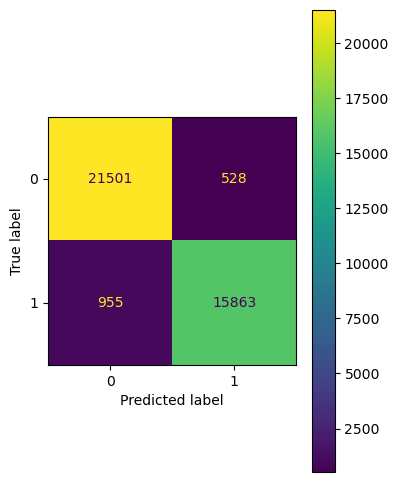

In [157]:
plot_confusion_matrix(grid_result,X_test,y_test.values.reshape(-1,1).ravel());

In [158]:
from sklearn.metrics import plot_precision_recall_curve,plot_roc_curve

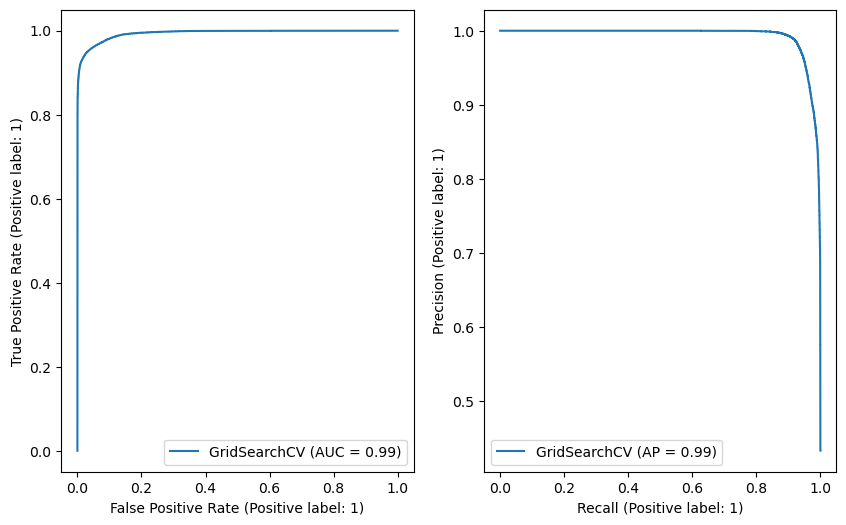

In [160]:
fig,ax=plt.subplots(1,2,figsize=(10,6));

plot_roc_curve(grid_result,X_test,y_test.values.reshape(-1,1).ravel(),ax=ax[0]);

plot_precision_recall_curve(grid_result,X_test,y_test.values.reshape(-1,1).ravel(),ax=ax[1]);

In [161]:
#SOLVING THE PROBLEM WITH ARTIFICIAL NEURAL NETWORKS

In [162]:
#Importing the libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [163]:
early=EarlyStopping(monitor="val_accuracy", patience=10)

In [165]:
#Creating the model
model=Sequential()
model.add(Dense(256,activation="relu",input_dim=X_train.shape[1]))
model.add(Dense(128,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(1,activation="sigmoid"))
model.compile(optimizer="adam",metrics="accuracy",loss="binary_crossentropy")
history=model.fit(X_train,y_train,epochs=200,batch_size=16,validation_split=0.2,callbacks=[early])

Epoch 1/200
4532/4532 [==============================] - 16s 3ms/step - loss: 0.1558 - accuracy: 0.9360 - val_loss: 0.1188 - val_accuracy: 0.9516
Epoch 2/200
4532/4532 [==============================] - 14s 3ms/step - loss: 0.1097 - accuracy: 0.9542 - val_loss: 0.1021 - val_accuracy: 0.9570
Epoch 3/200
4532/4532 [==============================] - 14s 3ms/step - loss: 0.0996 - accuracy: 0.9576 - val_loss: 0.0959 - val_accuracy: 0.9575
Epoch 4/200
4532/4532 [==============================] - 14s 3ms/step - loss: 0.0947 - accuracy: 0.9593 - val_loss: 0.0980 - val_accuracy: 0.9570
Epoch 5/200
4532/4532 [==============================] - 13s 3ms/step - loss: 0.0906 - accuracy: 0.9611 - val_loss: 0.0916 - val_accuracy: 0.9608
Epoch 6/200
4532/4532 [==============================] - 13s 3ms/step - loss: 0.0867 - accuracy: 0.9625 - val_loss: 0.0907 - val_accuracy: 0.9618
Epoch 7/200
4532/4532 [==============================] - 14s 3ms/step - loss: 0.0839 - accuracy: 0.9639 - val_loss: 0.0965 -

In [167]:
#Evaluating the model
model.evaluate(X_test,y_test,verbose=0)

[0.11085495352745056, 0.961901843547821]

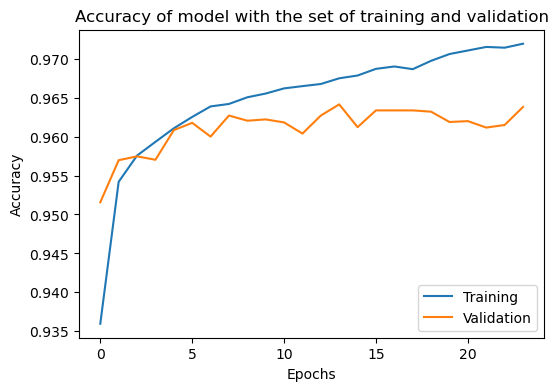

In [168]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(6,4))
plt.plot(history.history["accuracy"]);
plt.plot(history.history["val_accuracy"])
plt.title("Accuracy of model with the set of training and validation")
plt.xlabel("Epochs");
plt.ylabel("Accuracy");
plt.legend(["Training","Validation"],loc="lower right");

In [169]:
#Evaluating the model using classification_report

from sklearn.metrics import classification_report

y_pred=model.predict(X_test,verbose=0).round()

clas_rep=classification_report(y_test,y_pred)

print("Classification Report:")

print(clas_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     22029
           1       0.97      0.94      0.96     16818

    accuracy                           0.96     38847
   macro avg       0.96      0.96      0.96     38847
weighted avg       0.96      0.96      0.96     38847



In [170]:
class estimator:
  _estimator_type = ''
  classes_=[]
  def __init__(self, model, classes):
    self.model = model
    self._estimator_type = 'classifier'
    self.classes_ = classes
  def predict(self, X):
    y_prob= self.model.predict(X)
    y_pred = y_prob.round()
    return y_pred

classifier = estimator(model,[0,1])

1214/1214 [==============================] - 2s 2ms/step


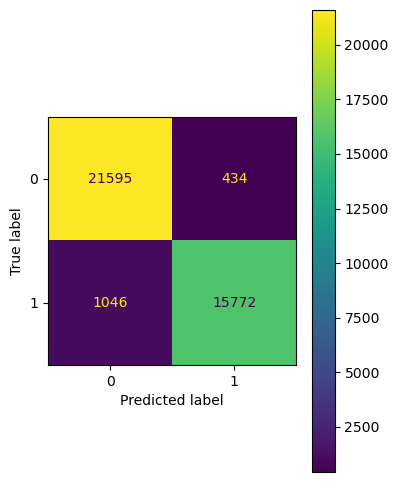

In [173]:
plot_confusion_matrix(classifier,X_test,y_test);